In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
df=pd.DataFrame(data=housing.data,columns=housing.feature_names)
df[housing.target_names[0]]=housing.target

# Transformacion logaritmica
Compensa sesgo positivo
$$
X'=\log(X),
$$
donde $X\in[1,\infty)$.

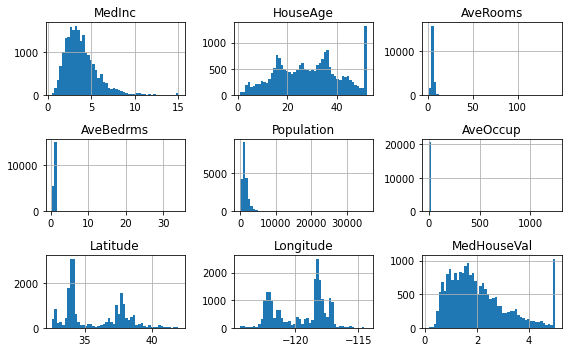

In [ ]:
h=df.hist(bins=50,figsize=(8,5))
plt.tight_layout()

In [ ]:
df.skew()

MedInc          1.646657
HouseAge        0.060331
AveRooms       20.697869
AveBedrms      31.316956
Population      4.935858
AveOccup       97.639561
Latitude        0.465953
Longitude      -0.297801
MedHouseVal     0.977763
dtype: float64

In [ ]:
df.AveOccup.max()

1243.3333333333333

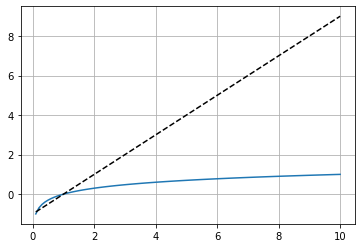

In [ ]:
# Grafica X vs X'
X=np.linspace(0.1,10,100)
Xp=np.log10(X)
plt.plot(X,Xp)
plt.plot(X,X-1,'--k')
plt.grid()

In [ ]:
df_t=df.copy()
df_t=np.log10(df-df.min()+1)
df.skew(),df_t.skew()

(MedInc          1.646657
 HouseAge        0.060331
 AveRooms       20.697869
 AveBedrms      31.316956
 Population      4.935858
 AveOccup       97.639561
 Latitude        0.465953
 Longitude      -0.297801
 MedHouseVal     0.977763
 dtype: float64, MedInc         0.078282
 HouseAge      -1.289170
 AveRooms       0.959245
 AveBedrms      8.298256
 Population    -1.140433
 AveOccup       2.662098
 Latitude      -0.080214
 Longitude     -0.745362
 MedHouseVal    0.237146
 dtype: float64)

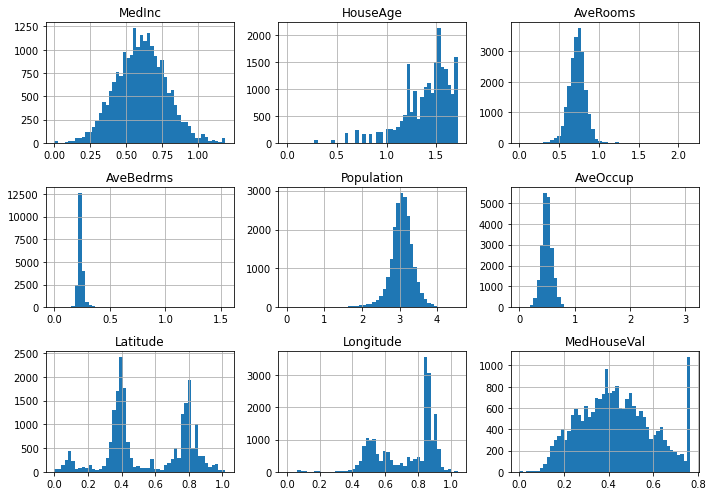

In [ ]:
df_t.hist(bins=50,figsize=(10,7))
plt.tight_layout()

# Transformación recíproca
Compensa sesgo positivo muy pronunciado
$$
X'=\frac{1}{X},
$$
donde $X\in[1,\infty)$.

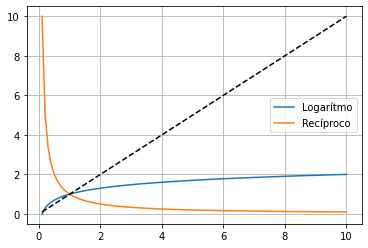

In [ ]:
# Comparación entre log y recíproco
plt.plot(X,Xp+1,label='Logarítmo')
plt.plot(X,1/X,label='Recíproco')
plt.plot(X,X,'--k')
plt.legend()
plt.grid()

In [ ]:
df_r=df.copy()
df_r=1/(df-df.min()+1)
df.skew(),df_r.skew()

(MedInc          1.646657
 HouseAge        0.060331
 AveRooms       20.697869
 AveBedrms      31.316956
 Population      4.935858
 AveOccup       97.639561
 Latitude        0.465953
 Longitude      -0.297801
 MedHouseVal     0.977763
 dtype: float64, MedInc          1.329928
 HouseAge        5.719626
 AveRooms        1.864921
 AveBedrms      -3.911728
 Population     80.838678
 AveOccup        0.612341
 Latitude        1.097306
 Longitude       2.185543
 MedHouseVal     0.507905
 dtype: float64)

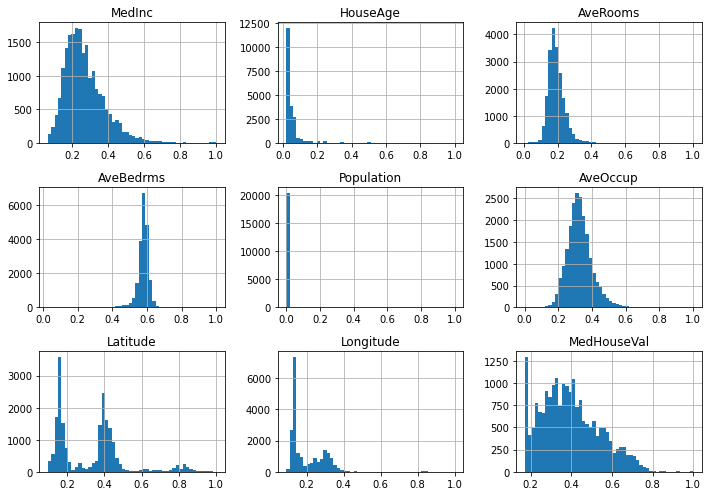

In [ ]:
df_r.hist(bins=50,figsize=(10,7))
plt.tight_layout()

# Regresión

In [ ]:
dft,dfr=df_t.skew().values,df_r.skew().values
np.abs(dft),np.abs(dfr)

(array([0.07828239, 1.28916984, 0.95924537, 8.29825562, 1.1404329 ,
        2.66209805, 0.08021368, 0.74536241, 0.2371457 ]),
 array([ 1.32992848,  5.71962582,  1.86492071,  3.9117278 , 80.83867774,
         0.61234061,  1.09730581,  2.18554341,  0.50790523]))

In [ ]:
for transformacion in zip(np.abs(dft),np.abs(dfr)):
  print(np.argmin(transformacion))

0
0
0
1
0
1
0
0
0


In [ ]:
df_t=df.copy()
for var in range(len(df.columns)):
  x=df.iloc[:,var]
  if var in (3,5):
    df_t.iloc[:,var]=1/(x-x.min()+1)
  else:
    df_t.iloc[:,var]=np.log10(x-x.min()+1)
df_t.skew()

MedInc         0.078282
HouseAge      -1.289170
AveRooms       0.959245
AveBedrms     -3.911728
Population    -1.140433
AveOccup       0.612341
Latitude      -0.080214
Longitude     -0.745362
MedHouseVal    0.237146
dtype: float64

In [ ]:
Xt,xt,Yt,yt=train_test_split(df_t.drop(columns='MedHouseVal'),df_t['MedHouseVal'])
lin=LinearRegression()
lin.fit(Xt,Yt)

LinearRegression()

In [ ]:
lin.score(Xt,Yt),lin.score(xt,yt)

(0.6293723625060769, 0.6121204693571834)

In [ ]:
df_t.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.604400,1.400658,0.728738,0.576377,3.049293,0.325632,0.548797,0.730180,0.433816
std,0.176024,0.246570,0.115886,0.048713,0.322996,0.074101,0.239255,0.175392,0.163272
min,0.000000,0.000000,0.000000,0.028791,0.000000,0.000804,0.000000,0.000000,0.000000
25%,0.486218,1.255273,0.662244,0.566190,2.894870,0.278555,0.378398,0.550228,0.310908
50%,0.605833,1.462398,0.731022,0.582938,3.065953,0.319917,0.434569,0.836324,0.422756
75%,0.719609,1.568202,0.792828,0.597819,3.236285,0.365306,0.790285,0.865696,0.543728
max,1.190337,1.716003,2.152481,1.000000,4.552425,1.000000,1.017451,1.042969,0.767157


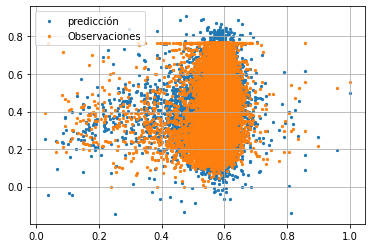

In [ ]:
plt.scatter(df_t['AveBedrms'],lin.predict(df_t.drop(columns='MedHouseVal')),label='predicción',s=5)
plt.scatter(df_t['AveBedrms'],df_t['MedHouseVal'],label='Observaciones',s=5)
plt.legend()
plt.grid()

In [ ]:
X,x,Y,y=train_test_split(df.drop(columns='MedHouseVal'),df['MedHouseVal'])
lin=LinearRegression()
lin.fit(X,Y)

LinearRegression()

In [ ]:
lin.score(X,Y),lin.score(x,y)

(0.6003723887144056, 0.6236873392096778)

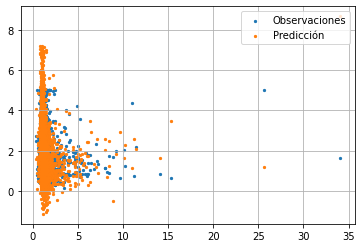

In [ ]:
plt.scatter(df['AveBedrms'],df['MedHouseVal'],label='Observaciones',s=5)
plt.scatter(df['AveBedrms'],lin.predict(df.drop(columns='MedHouseVal')),label='Predicción',s=5)
plt.legend(loc=1)
plt.grid()

In [ ]:
ruta='/content/drive/MyDrive/Colab Notebooks/ITESO/Ingeniería de características/P2023_MCD3735A/Módulo 5 - Transformación de variables numéricas/'
df=pd.read_csv(ruta+'regresion.csv')
df.head()

,x,y
0,0.100000,1.932916
1,0.101001,2.242087
2,0.102002,2.022414
3,0.103003,1.692315
4,0.104004,1.672025


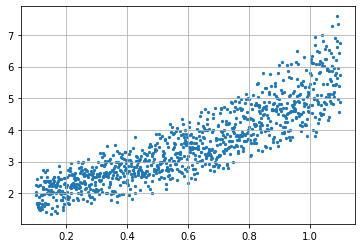

In [ ]:
plt.scatter(df['x'],df['y'],s=5)
plt.grid()

In [ ]:
df['y'].skew()

0.6089606600475832

In [ ]:
np.log(df['y']-df['y'].min()+1).skew(),(1/(df['y']-df['y'].min()+1)).skew()

(-0.15922700879254476, 1.0805166141039333)

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

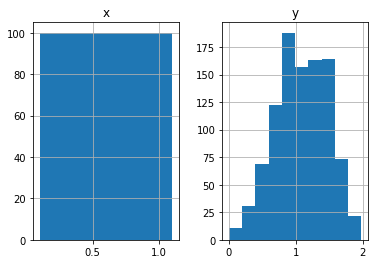

In [ ]:
df_t=df.copy()
df_t['y']=np.log(df['y']-df['y'].min()+1)
df_t.hist()

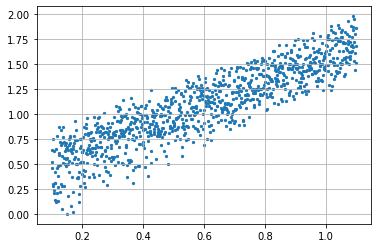

In [ ]:
plt.scatter(df_t['x'],df_t['y'],s=5)
plt.grid()

In [ ]:
lint=LinearRegression()
Xt,xt,Yt,yt=train_test_split(df_t[['x']],df_t['y'])
lint.fit(Xt,Yt)
lint.score(Xt,Yt),lint.score(xt,yt)

(0.8097037086867829, 0.7953782849814881)

In [ ]:
lin=LinearRegression()
X,x,Y,y=train_test_split(df[['x']],df['y'])
lin.fit(X,Y)
lin.score(X,Y),lin.score(x,y)

(0.7893372095678505, 0.7811255026582584)

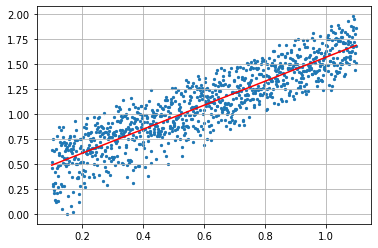

In [ ]:
plt.scatter(df_t['x'],df_t['y'],s=5)
plt.plot(df_t['x'],lint.predict(df_t[['x']]),'r')
plt.grid()

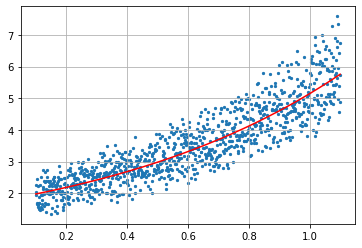

In [ ]:
plt.scatter(df['x'],df['y'],s=5)
prediccion=lint.predict(df[['x']])
y=np.exp(prediccion)+df['y'].min()-1
plt.plot(df['x'],y,'r')
plt.grid()